<a href="https://colab.research.google.com/github/beccycole/BigDataProject2021/blob/main/MainLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PySpark**

In [ ]:
# download Java, install Apache Spark 3.1.1 with Hadoop 2.7 and unzip folder
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!tar xf spark-3.0.2-bin-hadoop2.7.tgz

# install the findspark library
!pip install -q findspark

# set up environment path to enable PySpark to run in Colab
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"

# import findspark
import findspark
findspark.init()

# **Import SparkSession**

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

# **Import Boston Housing dataset CSV File from Github**

In [ ]:
!wget https://raw.githubusercontent.com/beccycole/BigDataProject2021/main/Boston.csv

--2021-04-24 08:19:11--  https://raw.githubusercontent.com/beccycole/BigDataProject2021/main/Boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37123 (36K) [text/plain]
Saving to: ‘Boston.csv’

Boston.csv          100%[===================>]  36.25K  --.-KB/s    in 0.001s  

2021-04-24 08:19:11 (25.4 MB/s) - ‘Boston.csv’ saved [37123/37123]



In [ ]:
!ls

Boston.csv   spark-3.0.2-bin-hadoop2.7
sample_data  spark-3.0.2-bin-hadoop2.7.tgz


## **Load Data into Spark Dataframe**

In [ ]:
# read the csv and load into a Spark dataframe using inferSchema parameter to automatically determine the data type for each column
df2 = spark.read.csv("Boston.csv", header=True, inferSchema=True)

# display first 6 rows
df2.show(6, truncate=False)

+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|_c0|crim   |zn  |indus|chas|nox  |rm   |age |dis   |rad|tax|ptratio|black |lstat|medv|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1  |0.00632|18.0|2.31 |0   |0.538|6.575|65.2|4.09  |1  |296|15.3   |396.9 |4.98 |24.0|
|2  |0.02731|0.0 |7.07 |0   |0.469|6.421|78.9|4.9671|2  |242|17.8   |396.9 |9.14 |21.6|
|3  |0.02729|0.0 |7.07 |0   |0.469|7.185|61.1|4.9671|2  |242|17.8   |392.83|4.03 |34.7|
|4  |0.03237|0.0 |2.18 |0   |0.458|6.998|45.8|6.0622|3  |222|18.7   |394.63|2.94 |33.4|
|5  |0.06905|0.0 |2.18 |0   |0.458|7.147|54.2|6.0622|3  |222|18.7   |396.9 |5.33 |36.2|
|6  |0.02985|0.0 |2.18 |0   |0.458|6.43 |58.7|6.0622|3  |222|18.7   |394.12|5.21 |28.7|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 6 rows



## **Exploratory Data Analysis**

In [ ]:
# print schema to check data types have been brought in correctly
df2.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



It can be seen from the Schema that all datatypes have been brought in correctly. All datatypes are numeric which is what is required for machine learning models.

In [ ]:
# display the number of rows
df2.count()

506

There are 506 rows in the dataset.

In [ ]:
# display the column names
df2.columns

['_c0',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

There are 15 columns - ID column, 13 input variables and 1 output variable.

In [ ]:
# rename column names and create a new Spark dataframe
df3 = df2.withColumnRenamed("_c0", "ID") \
    .withColumnRenamed("crim","crime_rate") \
    .withColumnRenamed("zn","large_zones") \
    .withColumnRenamed("indus","industrial") \
    .withColumnRenamed("chas","charles_river") \
    .withColumnRenamed("nox","nitric_oxide") \
    .withColumnRenamed("rm","rooms") \
    .withColumnRenamed("age","age") \
    .withColumnRenamed("dis","distance_employ") \
    .withColumnRenamed("rad","highway_access") \
    .withColumnRenamed("tax","property_tax") \
    .withColumnRenamed("ptratio","pupil_teacher_ratio") \
    .withColumnRenamed("black","black") \
    .withColumnRenamed("lstat","lower_status") \
    .withColumnRenamed("medv","house_price")

df3.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- crime_rate: double (nullable = true)
 |-- large_zones: double (nullable = true)
 |-- industrial: double (nullable = true)
 |-- charles_river: integer (nullable = true)
 |-- nitric_oxide: double (nullable = true)
 |-- rooms: double (nullable = true)
 |-- age: double (nullable = true)
 |-- distance_employ: double (nullable = true)
 |-- highway_access: integer (nullable = true)
 |-- property_tax: integer (nullable = true)
 |-- pupil_teacher_ratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lower_status: double (nullable = true)
 |-- house_price: double (nullable = true)



In [ ]:
# check for missing values
from pyspark.sql import functions as F

df3.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df3.columns]).show()

+---+----------+-----------+----------+-------------+------------+-----+---+---------------+--------------+------------+-------------------+-----+------------+-----------+
| ID|crime_rate|large_zones|industrial|charles_river|nitric_oxide|rooms|age|distance_employ|highway_access|property_tax|pupil_teacher_ratio|black|lower_status|house_price|
+---+----------+-----------+----------+-------------+------------+-----+---+---------------+--------------+------------+-------------------+-----+------------+-----------+
|  0|         0|          0|         0|            0|           0|    0|  0|              0|             0|           0|                  0|    0|           0|          0|
+---+----------+-----------+----------+-------------+------------+-----+---+---------------+--------------+------------+-------------------+-----+------------+-----------+



There are no missing values in the dataset.

### Create Queries on the Dataset

In [ ]:
# select rooms and medv columns and display the results
df3.select('rooms', 'house_price').show(10)

+-----+-----------+
|rooms|house_price|
+-----+-----------+
|6.575|       24.0|
|6.421|       21.6|
|7.185|       34.7|
|6.998|       33.4|
|7.147|       36.2|
| 6.43|       28.7|
|6.012|       22.9|
|6.172|       27.1|
|5.631|       16.5|
|6.004|       18.9|
+-----+-----------+
only showing top 10 rows



In [ ]:
# groupby charles_river and count how many house in the dataset are by the charles_river and how many are not
df3.groupBy("charles_river").count().sort("charles_river",ascending=False).show()

+-------------+-----+
|charles_river|count|
+-------------+-----+
|            1|   35|
|            0|  471|
+-------------+-----+



In [ ]:
# group and count by house_price
df3.groupBy("house_price").count().sort("house_price",ascending=False).show(10)

+-----------+-----+
|house_price|count|
+-----------+-----+
|       50.0|   16|
|       48.8|    1|
|       48.5|    1|
|       48.3|    1|
|       46.7|    1|
|       46.0|    1|
|       45.4|    1|
|       44.8|    1|
|       44.0|    1|
|       43.8|    1|
+-----------+-----+
only showing top 10 rows



# **Visualising the Data**
The raw descriptive statistics displayed above give all the relevant information on each of the variables in the dataset, however using visual tools such as histograms, boxplots and scatterplots make it easier to visualise the distribution and relationships of the variables.

## **Output Variable - House Price**
Using the Python libraries Matplotlib and Seaborn, the distribution of the output variable 'house_price' will be visualised using the histogram and boxplot functions.

In [ ]:
# import python library for plotting
import matplotlib.pyplot as plt

# import pandas
import pandas as pd

%matplotlib inline

# convert the spark dataframe to a pandas dataframe for visualisation purposes
pandas_df = df3.toPandas()

print(pandas_df)

      ID  crime_rate  large_zones  ...   black  lower_status  house_price
0      1     0.00632         18.0  ...  396.90          4.98         24.0
1      2     0.02731          0.0  ...  396.90          9.14         21.6
2      3     0.02729          0.0  ...  392.83          4.03         34.7
3      4     0.03237          0.0  ...  394.63          2.94         33.4
4      5     0.06905          0.0  ...  396.90          5.33         36.2
..   ...         ...          ...  ...     ...           ...          ...
501  502     0.06263          0.0  ...  391.99          9.67         22.4
502  503     0.04527          0.0  ...  396.90          9.08         20.6
503  504     0.06076          0.0  ...  396.90          5.64         23.9
504  505     0.10959          0.0  ...  393.45          6.48         22.0
505  506     0.04741          0.0  ...  396.90          7.88         11.9

[506 rows x 15 columns]


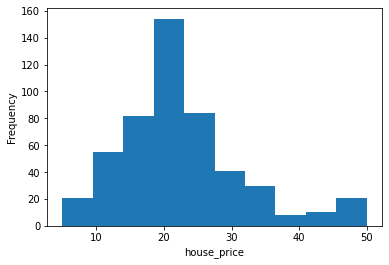

In [ ]:
# create a histogram on the output variable 'house_price'
plt.hist(pandas_df['house_price'])

# set the name of the x-axis
plt.xlabel("house_price")

# set the name of the y-axis
plt.ylabel("Frequency")

# plot the histogram
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


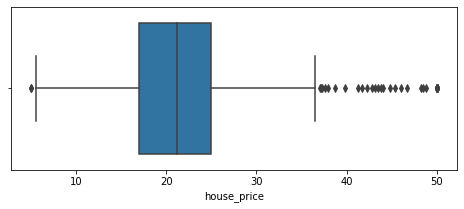

In [ ]:
# import plotting library seaborn
import seaborn as sns

# create a boxplot on variable 'house_price'
plt.figure(figsize=(8,3))
sns.boxplot(pandas_df['house_price'])

It can seen from the histogram that the distribution of house_price is slightly skewed right with several outliers. This shows it is not normally distributed around the mean, but distributed slightly below the mean. The values are centred around 22,000, the minimum value is 5,000 and the maximum value is 50,000.

The boxplot shows a symmetric distribution with one outlier to the left and several to the right. The range of the distribution is 45,000.

## **Input Variables**
The scatter plot function from the Python library Matplotlib will be used to visualise the distribution of the data for the input variables. This will determine which input variables have a linear relationship with the output variable - the initial judgment of possible relationships between two continuous variables is often made on the basis of a scatter plot. Only the scatter plots that show a linear relationship with the output variable will be showed in this notebook.

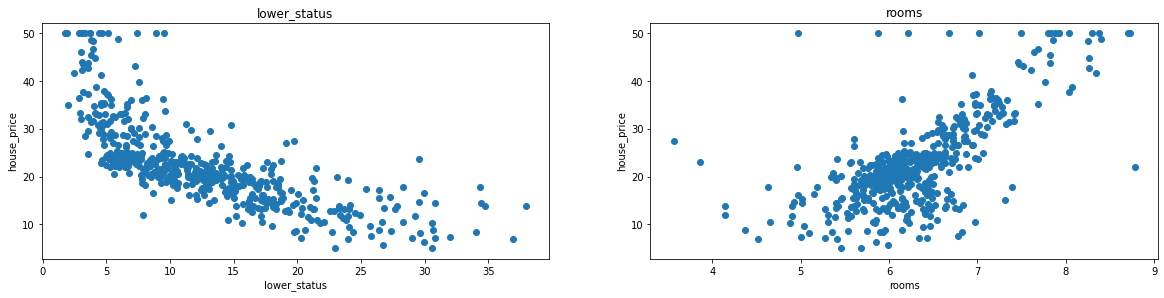

In [ ]:
# set plot size
plt.figure(figsize=(20, 20))

# assign variables 
features = ['lower_status', 'rooms']
target = pandas_df['house_price']

# plot each feature with target variable
for i, col in enumerate(features):
    plt.subplot(4, len(features) , i+1)
    x = pandas_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('house_price')

In conclusion the input variables lower_status and rooms have a linear relationship with the output variable house_price.

# **Descriptive Statistics**
The decribe method is a Spark statistical operation to return descriptive statistics on columns in the Spark dataframe. The statistical metrics that are available include maximum, minimum, mean, variance, number of non-zeros, and count.


In [ ]:
# use describe method on all variables in the Boston Housing dataset
display(df3.describe())


summary,ID,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,age,distance_employ,highway_access,property_tax,pupil_teacher_ratio,black,lower_status,house_price
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
mean,253.5,3.6135235573122535,11.363636363636363,11.136778656126504,0.0691699604743083,0.5546950592885372,6.284634387351787,68.57490118577078,3.795042687747034,9.549407114624506,408.2371541501976,18.455533596837967,356.67403162055257,12.653063241106723,22.532806324110698
stddev,146.2138844296259,8.601545105332491,23.32245299451514,6.860352940897589,0.2539940413404101,0.11587767566755584,0.7026171434153232,28.148861406903595,2.10571012662761,8.707259384239366,168.53711605495903,2.1649455237144455,91.29486438415782,7.141061511348571,9.197104087379815
min,1,0.00632,0.0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5.0
max,506,88.9762,100.0,27.74,1,0.871,8.78,100.0,12.1265,24,711,22.0,396.9,37.97,50.0


In [ ]:
# use describe method on a single variable - house_price
display(df3.select("house_price").describe())

summary,house_price
count,506
mean,22.532806324110698
stddev,9.197104087379815
min,5.0
max,50.0


# **Correlation**
Correlation measures the statistical relationship between two continuous independent variables. It gives information about the magnitude of the correlation as well as the direction of the relationship.

Three widely used correlation statistics are the Pearson correlation, Kendall rank correlation and Spearman correlation. For this project the Spearman correlation will be used to measure the relationship between variables as the variables are not normally distributed and there are some outliers.

The output of the correlation function will fall within the range - 1 to + 1 and can be analysed as follows:

* Perfect correlation exists if the value is near to ± 1: as one variable 
increases, the other variable tends to increase (if positive) or decrease (if negative).
* A strong correlation exists if the coefficient value lies between ± 0.50 and ± 1.
* A medium correlation exists if the value lies between ± 0.30 and ± 0.49.
* A small correlation exists if the value lies below + 0.29.
* No correlation exists when the value is zero.

The Spearman function fron Spark MLlib will be used to identify variables where a strong correlation exists (greater than 0.5), between the input variables and the output variable house_price.


In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Summarizer

# input all the features in one vector column
assembler = VectorAssembler(inputCols=['crime_rate', 'rooms', 'age', 'distance_employ', 'highway_access',
       'property_tax', 'pupil_teacher_ratio', 'lower_status', 'house_price'], outputCol = 'features')

assembled = assembler.transform(df3)

# to select the features and house_price column only
#vector_data = output.select("features","house_price")

#vector_data.show()

# use the correlation method spearman on the boson housing dataset
spearman_corr = Correlation.corr(assembled, 'features', 'spearman')

corr_list = spearman_corr.head()[0].toArray().tolist()
spearman_corr_df = spark.createDataFrame(corr_list)
spearman_corr_df.show(truncate=False)


+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+
|_1                  |_2                  |_3                 |_4                  |_5                  |_6                 |_7                  |_8                 |_9                 |
+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+
|1.0                 |-0.30911647087458266|0.7041399841460588 |-0.7449861410662116 |0.7278069679393689  |0.7290448989667168 |0.46528318902806937 |0.6347602625178879 |-0.5588909488368805|
|-0.30911647087458266|1.0                 |-0.2780820199539358|0.26316822499481807 |-0.1074921975191981 |-0.2718984579208374|-0.3129225741853121 |-0.6408315569796796|0.6335764254337742 |
|0.7041399841460588  |-0.2780820199539358 |1.0                |-0

This table is not very clear as the columns are not labelled. Another way is to display the results in a clearer indexed and labelled dataframe as shown below.

In [ ]:
# print schema
df3.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- crime_rate: double (nullable = true)
 |-- large_zones: double (nullable = true)
 |-- industrial: double (nullable = true)
 |-- charles_river: integer (nullable = true)
 |-- nitric_oxide: double (nullable = true)
 |-- rooms: double (nullable = true)
 |-- age: double (nullable = true)
 |-- distance_employ: double (nullable = true)
 |-- highway_access: integer (nullable = true)
 |-- property_tax: integer (nullable = true)
 |-- pupil_teacher_ratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lower_status: double (nullable = true)
 |-- house_price: double (nullable = true)



In [ ]:
# drop irrelevant columns from the dataframe
df4 = df3.drop("ID", "large_zones", "industrial", "charles_river", "nitric_oxide", "black")
df4.show(6)

+----------+-----+----+---------------+--------------+------------+-------------------+------------+-----------+
|crime_rate|rooms| age|distance_employ|highway_access|property_tax|pupil_teacher_ratio|lower_status|house_price|
+----------+-----+----+---------------+--------------+------------+-------------------+------------+-----------+
|   0.00632|6.575|65.2|           4.09|             1|         296|               15.3|        4.98|       24.0|
|   0.02731|6.421|78.9|         4.9671|             2|         242|               17.8|        9.14|       21.6|
|   0.02729|7.185|61.1|         4.9671|             2|         242|               17.8|        4.03|       34.7|
|   0.03237|6.998|45.8|         6.0622|             3|         222|               18.7|        2.94|       33.4|
|   0.06905|7.147|54.2|         6.0622|             3|         222|               18.7|        5.33|       36.2|
|   0.02985| 6.43|58.7|         6.0622|             3|         222|               18.7|        5

In [ ]:
from pyspark.ml.stat import Correlation

spearman_corr = Correlation.corr(assembled, 'features', 'spearman').collect()[0][0]
pandas_DF = pd.DataFrame(spearman_corr.toArray())

# labels index and columns to interpret the results
pandas_DF.index, pandas_DF.columns = df4.columns, df4.columns
pandas_DF

,crime_rate,rooms,age,distance_employ,highway_access,property_tax,pupil_teacher_ratio,lower_status,house_price
crime_rate,1.000000,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,0.634760,-0.558891
rooms,-0.309116,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,-0.640832,0.633576
age,0.704140,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,0.657071,-0.547562
distance_employ,-0.744986,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,-0.564262,0.445857
highway_access,0.727807,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,0.394322,-0.346776
property_tax,0.729045,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,0.534423,-0.562411
pupil_teacher_ratio,0.465283,-0.312923,0.355384,-0.322041,0.318330,0.453345,1.000000,0.467259,-0.555905
lower_status,0.634760,-0.640832,0.657071,-0.564262,0.394322,0.534423,0.467259,1.000000,-0.852914
house_price,-0.558891,0.633576,-0.547562,0.445857,-0.346776,-0.562411,-0.555905,-0.852914,1.000000


Rooms and lower_status are highly correlated to house_price with coefficients of 0.63 and 0.85 respectively. All other variables are not strongly correlated to house_price.

# **Machine Learning Model**

Since the output house_price is a continuous variable a supervised linear regression model will be used for prediction.

In a linear regression model there is a presumption that the input variables should have a linear relationship with the output variable. From the visualisations it was seen that rooms and lower_status had linear relationships with house_price. These two features will be used in the linear regression models.



In linear algebra a vector is an array of numbers where each value is called a scaler. Vectors are critical for machine learning because machine learning algorithms use vectors as input data. Using Spark, the dataframe will be converted into DenseVectors of decimal places that can then be fed into the machine learning algorithms. To complete this transformation the VectorAssembler will be used to create one column of vectors.

## Import modules from PySpark MLlib

In [ ]:
# import VectorAssembler and LinearRegression modules from the PySpark API
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors

from pyspark.ml.feature import MinMaxScaler

# import LinearRegression
from pyspark.ml.regression import LinearRegression

# import regression metrics for evaluation
from pyspark.mllib.evaluation import RegressionMetrics


## Create one column vector

In [ ]:
# input the two correlated features into one vector column
assembler = VectorAssembler(inputCols=['rooms', 'lower_status'], outputCol = 'features')

output = assembler.transform(df4)

# to select the features and house_price column only
vector_data = output.select("features","house_price")

vector_data.show()
#output.show()

+-------------+-----------+
|     features|house_price|
+-------------+-----------+
| [6.575,4.98]|       24.0|
| [6.421,9.14]|       21.6|
| [7.185,4.03]|       34.7|
| [6.998,2.94]|       33.4|
| [7.147,5.33]|       36.2|
|  [6.43,5.21]|       28.7|
|[6.012,12.43]|       22.9|
|[6.172,19.15]|       27.1|
|[5.631,29.93]|       16.5|
| [6.004,17.1]|       18.9|
|[6.377,20.45]|       15.0|
|[6.009,13.27]|       18.9|
|[5.889,15.71]|       21.7|
| [5.949,8.26]|       20.4|
|[6.096,10.26]|       18.2|
| [5.834,8.47]|       19.9|
| [5.935,6.58]|       23.1|
| [5.99,14.67]|       17.5|
|[5.456,11.69]|       20.2|
|[5.727,11.28]|       18.2|
+-------------+-----------+
only showing top 20 rows



## MinMaxScaler
Normalize the data using the MinMaxScaler which scales each variable to have values between 0 and 1.

In [ ]:
# apply MinMaxScaler transformation to the features
#features_MinMaxScaler = MinMaxScaler(inputCol = 'features', outputCol = 'scaled_features')

#output_scaled = features_MinMaxScaler.fit(vector_data)

#scaled_features_df = output_scaled.transform(vector_data)

#scaled_features_df.show(10)

The performance of the model declined when MinMaxScaler was applied to the data so was not used.

## Create a training and test set

In [ ]:
# split the dataset into training and testing data - 80:20 split
splits = vector_data.randomSplit([0.8, 0.2])
train_df = splits[0]
test_df = splits[1]

## Linear regression model
Build a linear regression model, fit the model to the training set and make predictions from the trained model using the test set.

In [ ]:
# create linear regression model
lr = LinearRegression(featuresCol = 'features', labelCol = 'house_price')

# learn to fit the model from training set
lr_model = lr.fit(train_df)

# make predictions from trained model using test dataset
predictions = lr_model.transform(test_df)

# show the predictions
predictions.show(10)

+-------------+-----------+------------------+
|     features|house_price|        prediction|
+-------------+-----------+------------------+
|[4.906,34.77]|       13.8|1.7884492208278584|
| [4.963,14.0]|       21.9|15.513695460400294|
|[5.186,28.32]|       17.8|7.2820233404595465|
|[5.277,30.81]|        7.2| 6.095828102350652|
|[5.344,23.09]|       20.0|11.412421970239322|
|[5.427,18.14]|       13.8| 15.00933386120977|
|[5.453,30.59]|        5.0| 7.064551435628467|
|[5.531,27.38]|        8.5| 9.510579825863383|
|[5.594,13.09]|       17.4|19.065351288146008|
|[5.599,16.51]|       13.9| 16.87287338746116|
+-------------+-----------+------------------+
only showing top 10 rows



### Coefficients

In [ ]:
print("Coefficients: {0:.1f}, {1:.1f}".format(*lr_model.coefficients))
print("Intercept: {0:.1f}".format(lr_model.intercept))

Coefficients: 4.7, -0.6
Intercept: 1.3


predicted house price = (4.7 x number of rooms)-(0.6 x %lower status)+1.3

### Evaluate the Model
The statistical metrics r2 and RMSE were used to calculate the performance of the model on the test data.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","house_price","features").show(5)

lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="house_price",metricName="r2")

print("R Squared (r2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+-----------+-------------+
|        prediction|house_price|     features|
+------------------+-----------+-------------+
|1.7884492208278584|       13.8|[4.906,34.77]|
|15.513695460400294|       21.9| [4.963,14.0]|
|7.2820233404595465|       17.8|[5.186,28.32]|
| 6.095828102350652|        7.2|[5.277,30.81]|
|11.412421970239322|       20.0|[5.344,23.09]|
+------------------+-----------+-------------+
only showing top 5 rows

R Squared (r2) on test data = 0.717594


The R-squared value is greater than 0.6 which signifies the model is performing well on the test data.

In [ ]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 5.04596


The RMSE value is fairly low at 5.05 - the closer the value to zero the better.

In [ ]:
# run the describe method on the test set
test_df.describe().show()

+-------+------------------+
|summary|       house_price|
+-------+------------------+
|  count|               103|
|   mean|21.877669902912622|
| stddev|  9.54168287905637|
|    min|               5.0|
|    max|              50.0|
+-------+------------------+



This is pretty accurate - count, min and max are correct and the mean and standard deviation are close to the values calculated for the entire dataset of 22.53 and 9.20 respectively.